In [ ]:
#imports
import os
import numpy as np
import pandas as pd 
from IPython.display import Audio
from IPython.display import display
import matplotlib.pyplot as plt
import librosa
import librosa.display
import natsort
from scipy import signal
from scipy.io import wavfile
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#connecting to drive
from google.colab import drive
drive.mount('/content/gdrive')
data_path = '/content/gdrive/MyDrive/pattern/Crema'


Mounted at /content/gdrive


# **1. Download the Dataset and Understand the Format**

# **Write your own function that loads an audio**

In [ ]:
# prepare data
def load_data() :
    dataFrame = pd.DataFrame(columns = ['Path','FileName', 'Label'])
    # i=0
    for file in natsort.natsorted(os.listdir(data_path)):
            fileName = file.split("_")
            label=fileName[2]
            # append rows to an empty DataFrame
            dataFrame = dataFrame.append({'Path':os.path.join(data_path , file),'FileName' : file, 'Label' : label}, ignore_index = True)

    print(dataFrame.head())
    return dataFrame


# **listen to each of the classes**

In [ ]:
def play_audio(file_path) :
   audio = Audio(file_path) 
   display(audio)

# **plot the waveform of the audio**

In [ ]:
def plot_wave(file_path,i):
  sound, sr = librosa.load(file_path)
  # fig, ax = plt.subplots(1,3, figsize = (30,10), sharey = True)
  # librosa.display.waveplot(sound, sr=sr , ax=ax[i%3])
  # ax[i%3].set(title = file_path)
  fig, ax = plt.subplots(1,figsize = (30,10), sharey = True)
  librosa.display.waveplot(sound, sr=sr)
  plt.title( file_path)
  plt.show()

In [ ]:
def play_and_display(i,j,dataframe):
  for x in range(i, j):
    file_path=dataframe.loc[x][0]
    plot_wave(file_path,x)
    play_audio(file_path)

In [ ]:
dataframe=load_data()

                                                Path             FileName  \
0  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_ANG_XX.wav   
1  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_DIS_XX.wav   
2  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_FEA_XX.wav   
3  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_HAP_XX.wav   
4  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_NEU_XX.wav   

  Label  
0   ANG  
1   DIS  
2   FEA  
3   HAP  
4   NEU  


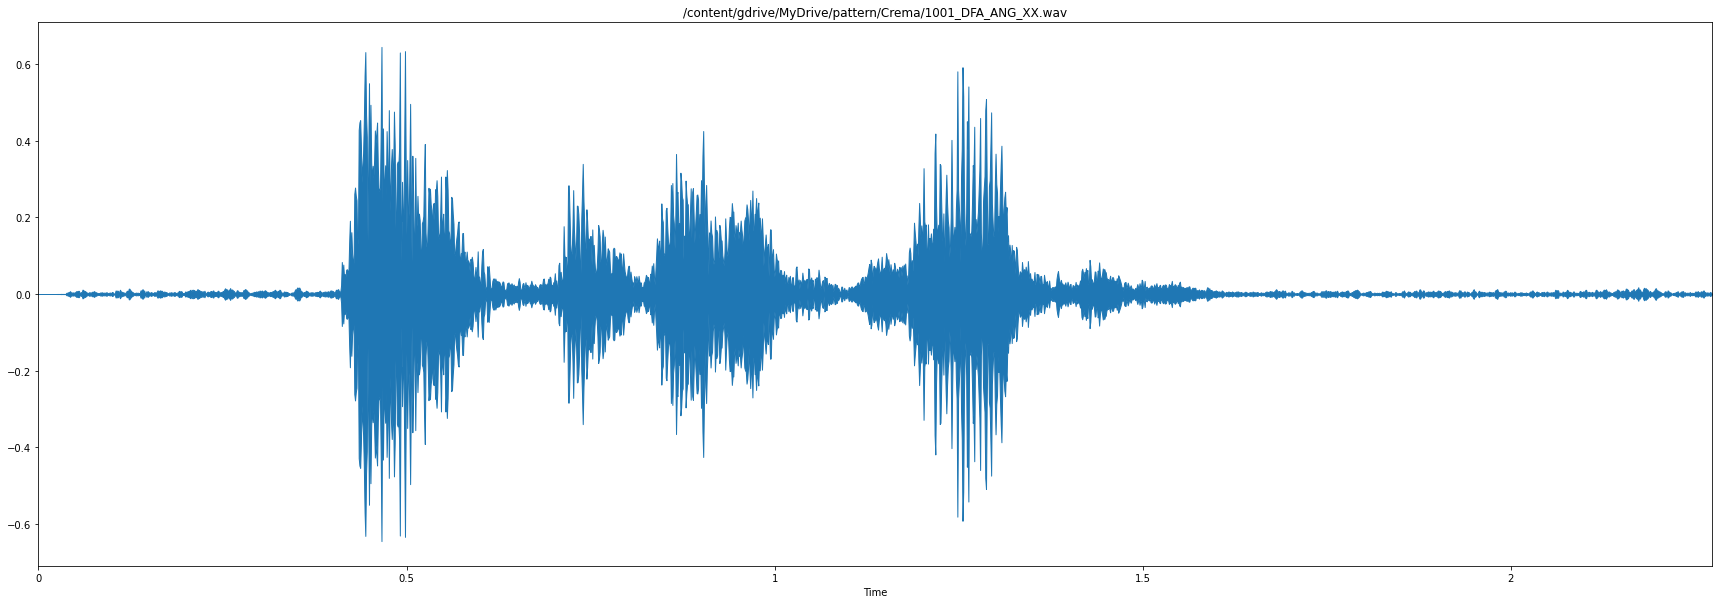

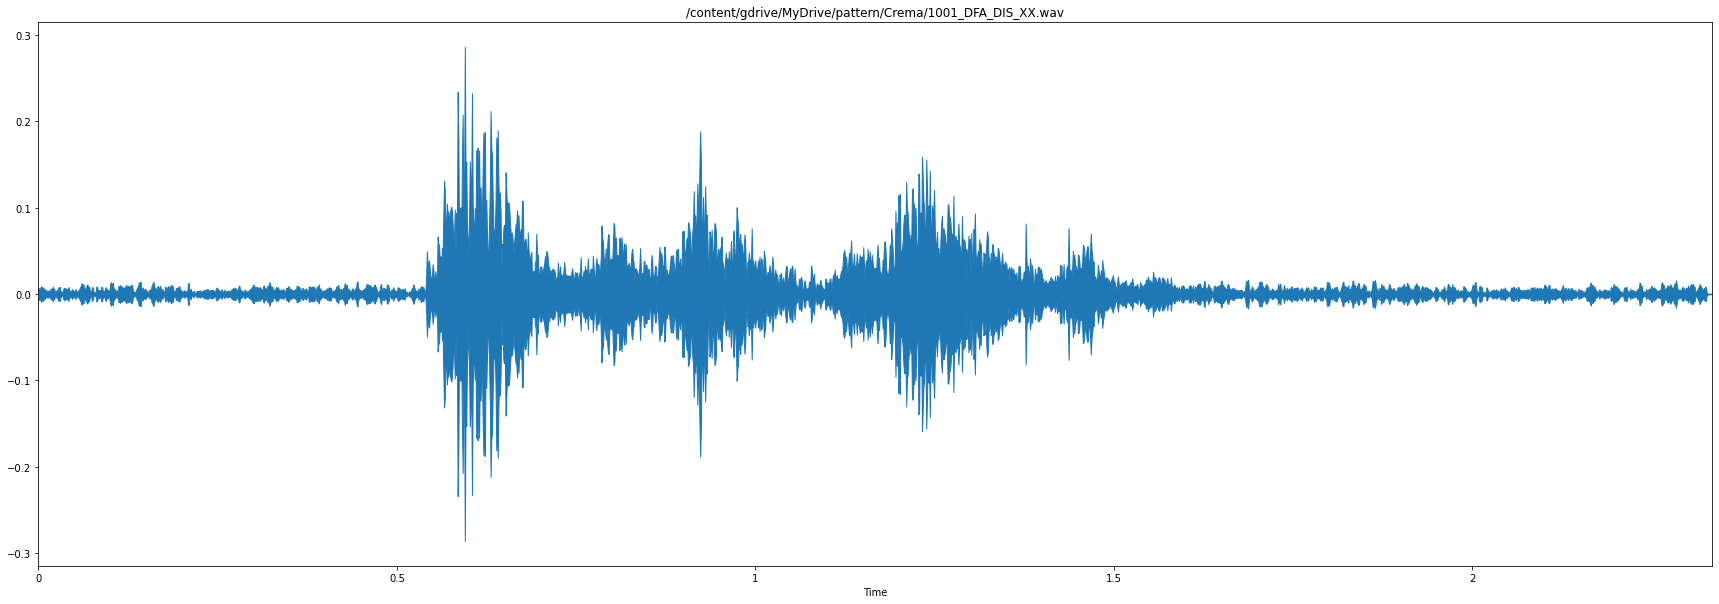

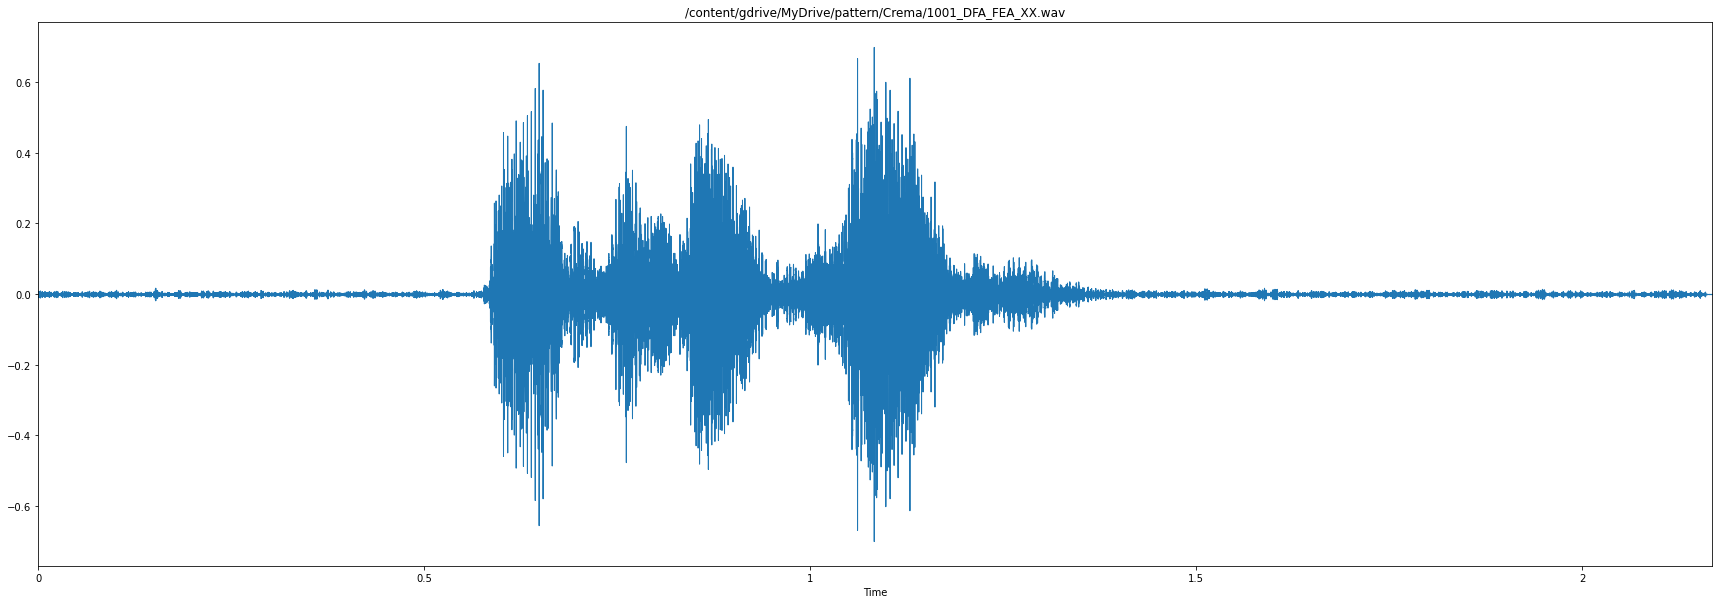

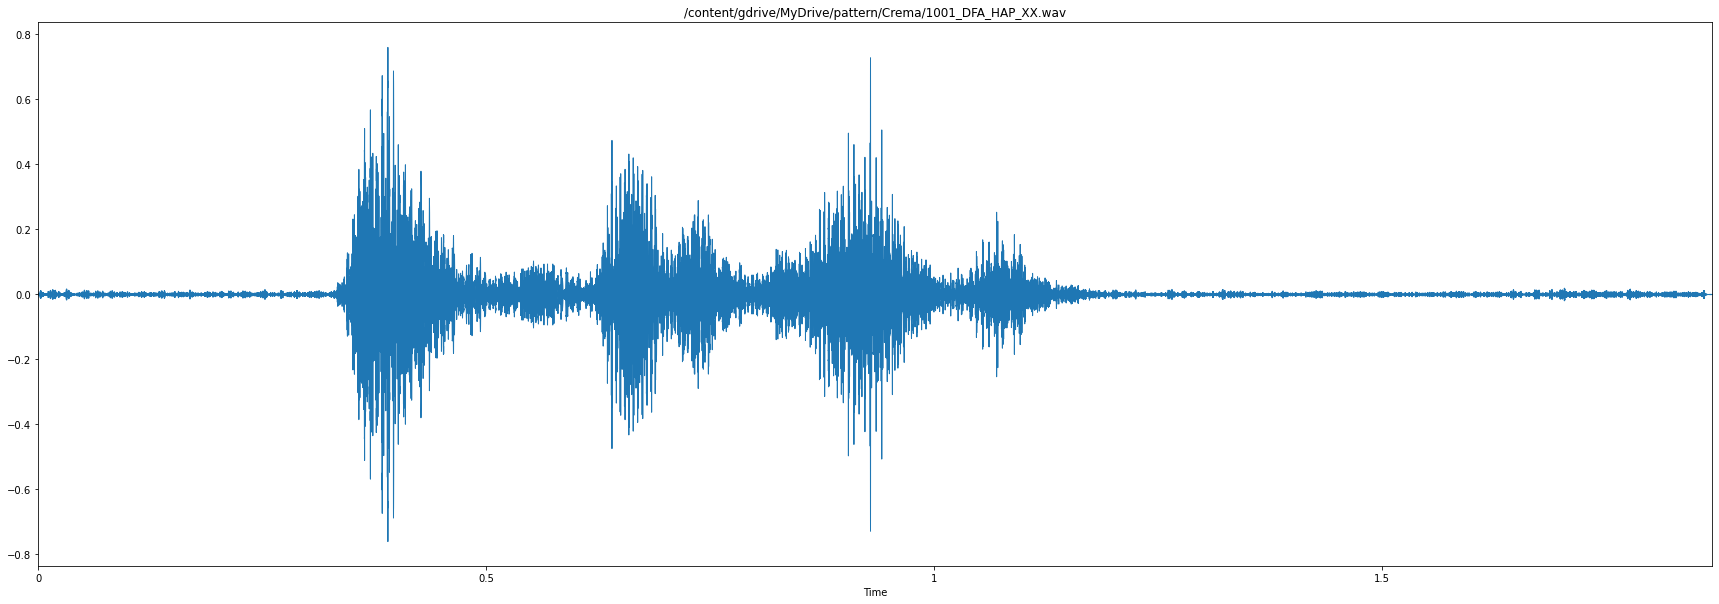

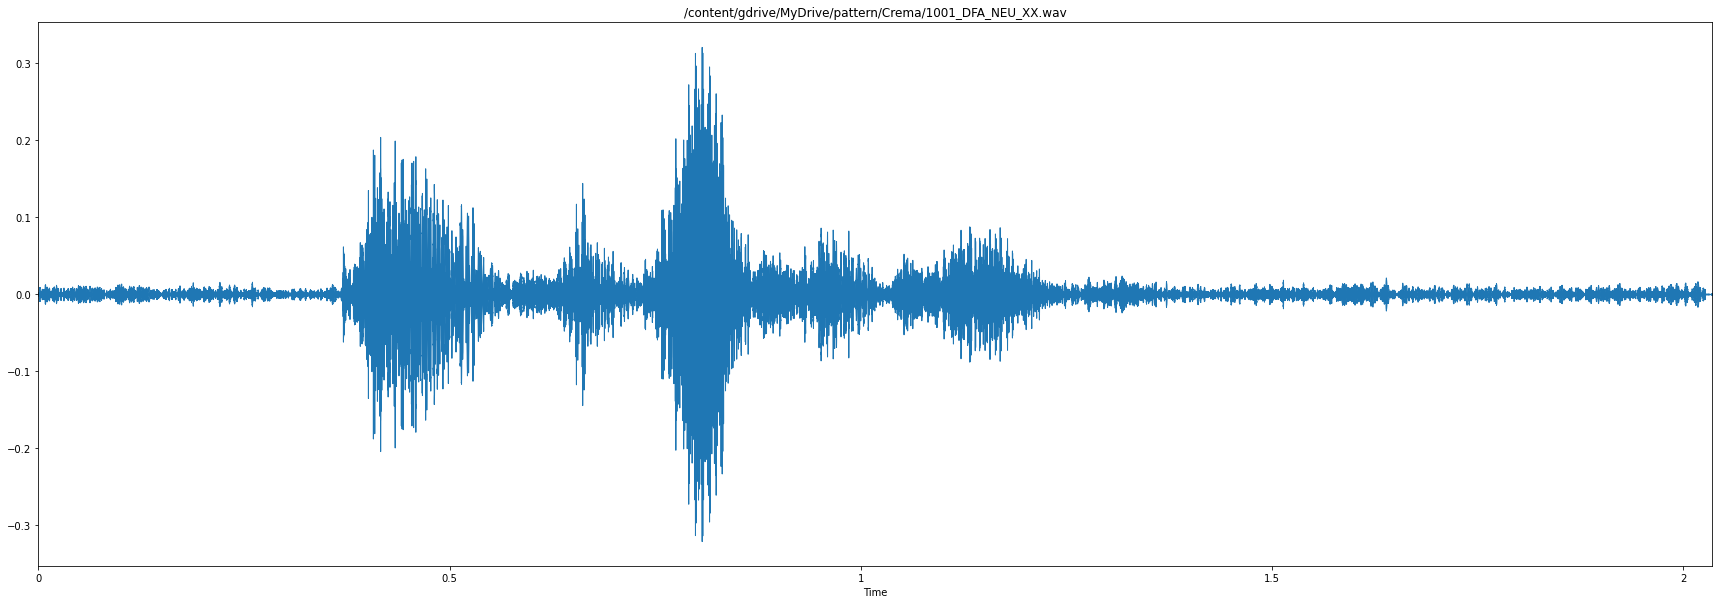

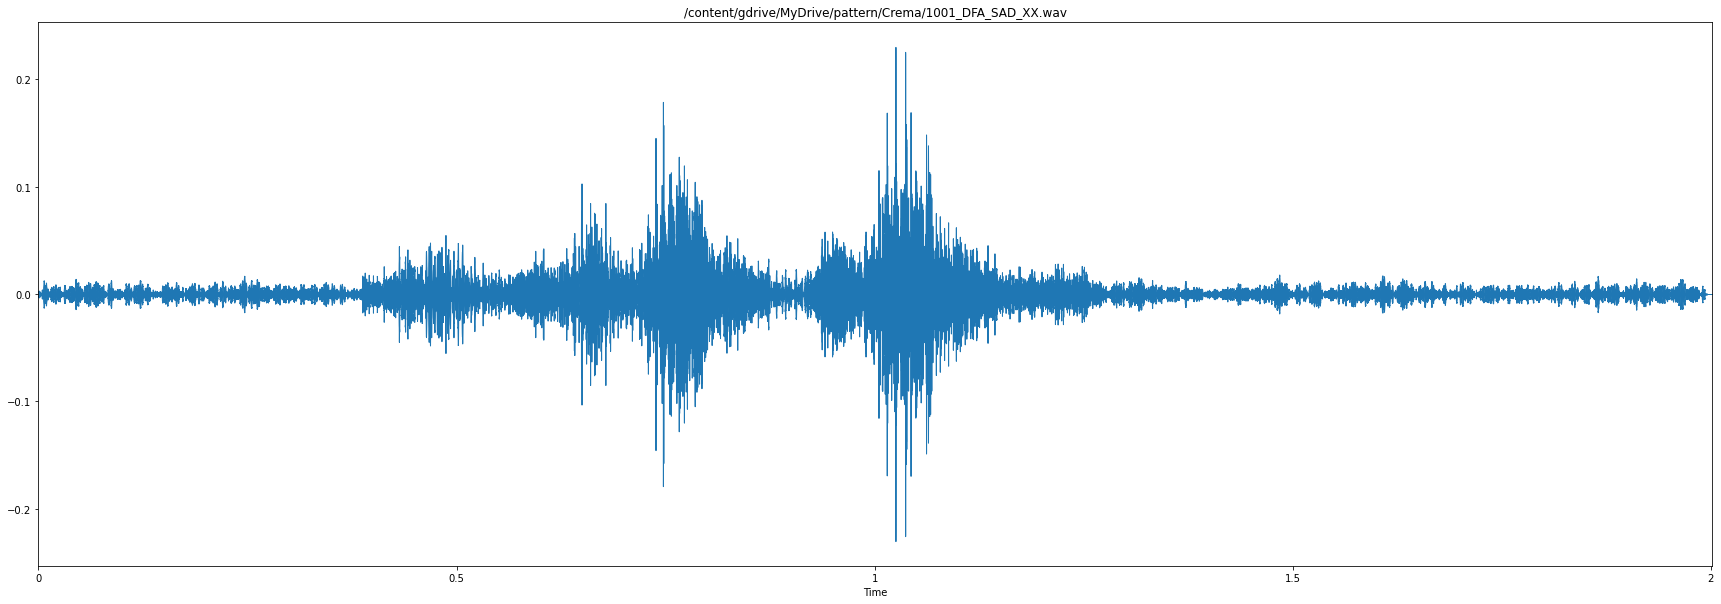

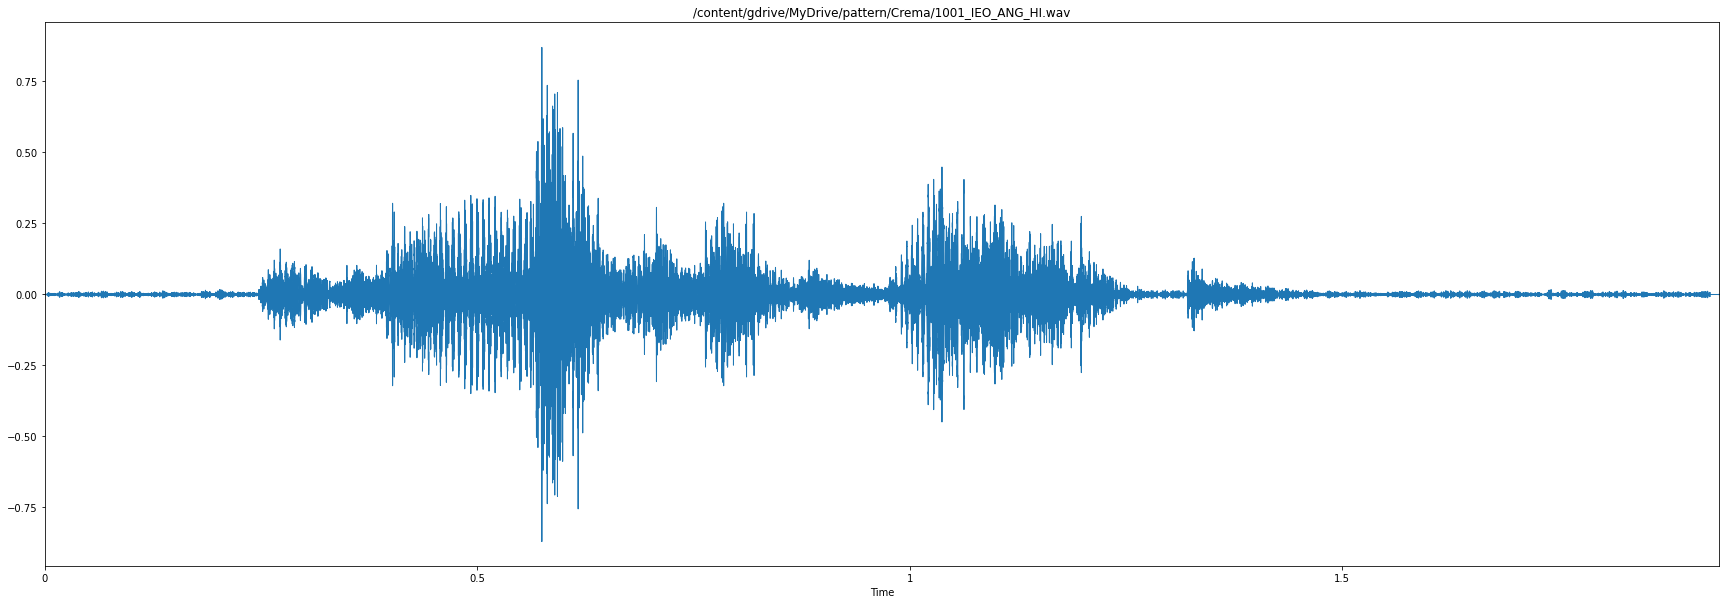

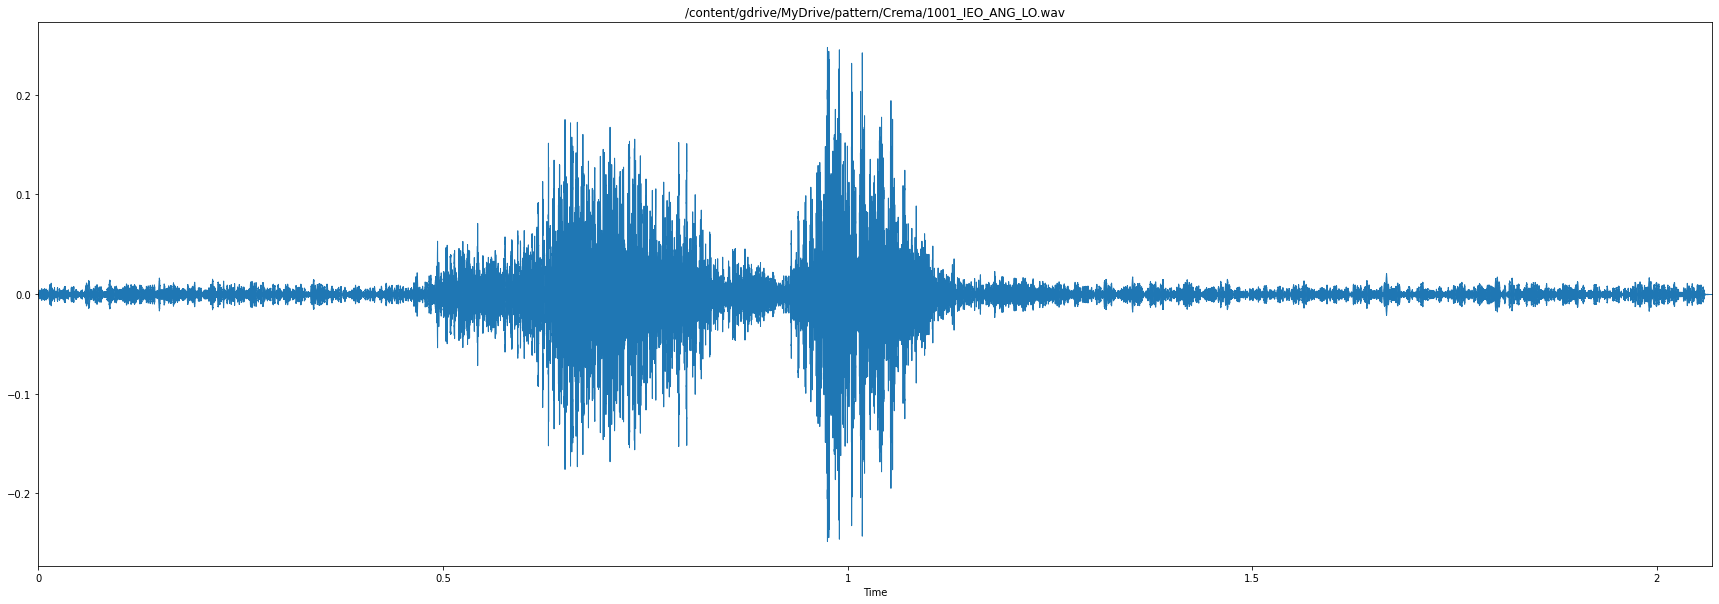

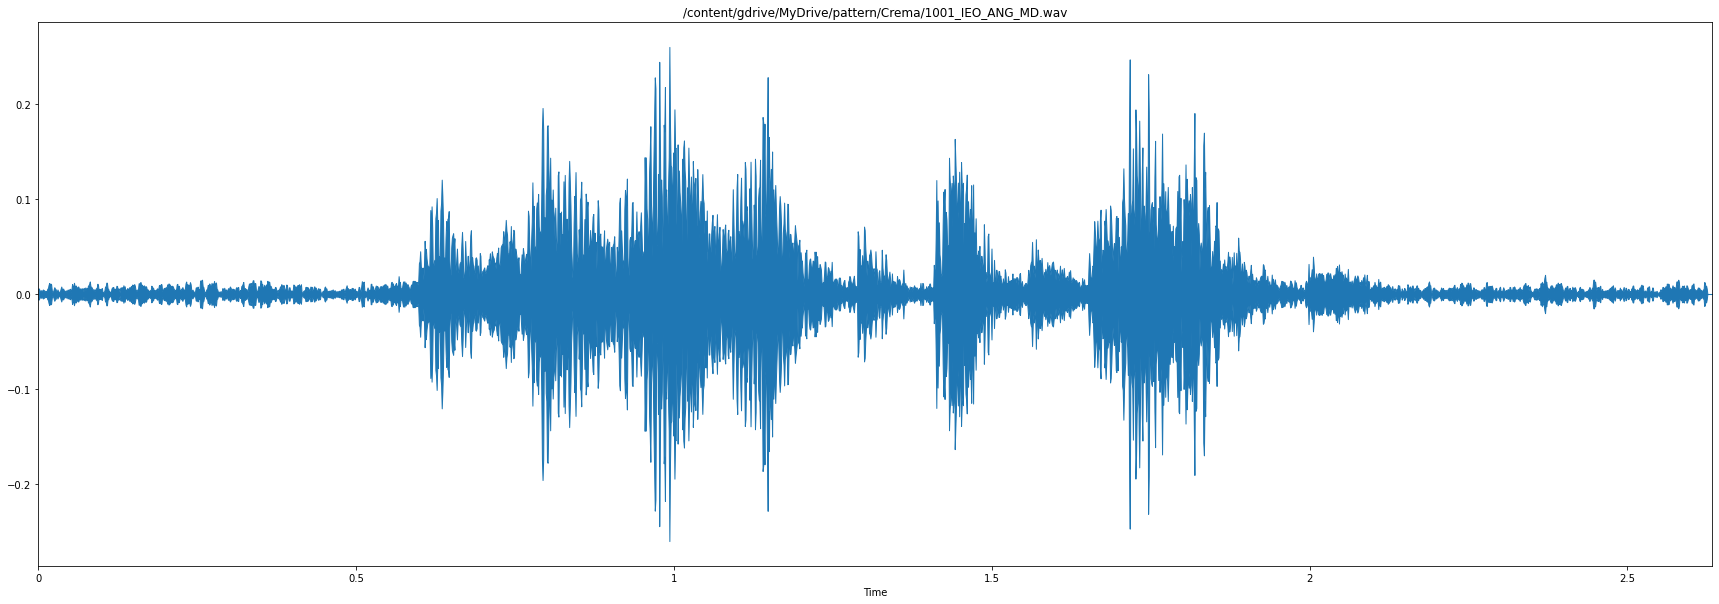

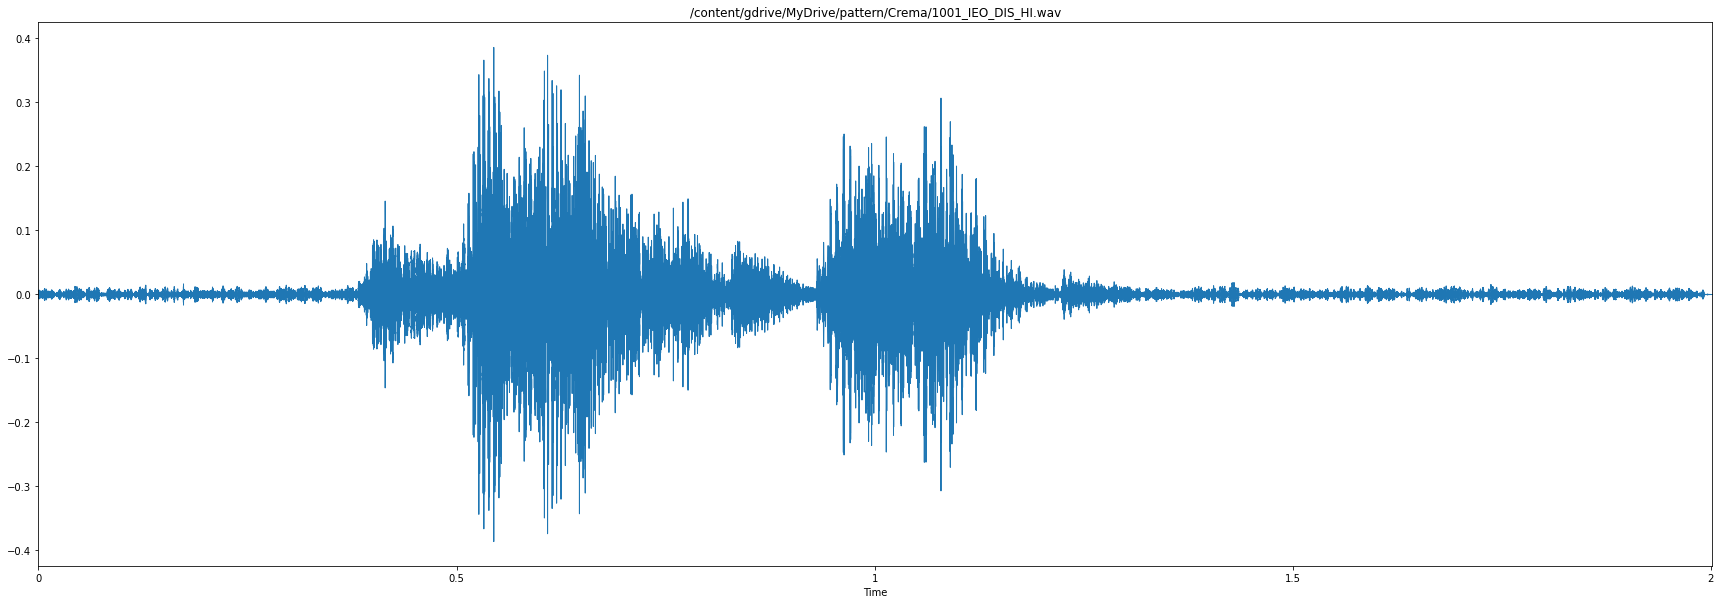

In [ ]:
play_and_display(0,10,dataframe)

## **2. Create the Feature Space**

# a. You can work on time domain, or you can work in frequency domain.
#There are multiple of features that can help improving the model:



In [ ]:
def mel_spectogram(sound,sr):
    mel_spect = librosa.feature.melspectrogram(y=sound, sr=sr)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    return mel_spect

i. Zero crossing rate: The rate of sign-changes of the signal during
the duration of a particular frame.

In [ ]:
def zero_crossingRate(sound):
  return librosa.feature.zero_crossing_rate(y=sound)

ii. Energy: The sum of squares of the signal values, normalized by
the respective frame length.

In [ ]:
def energy(sound):
   return librosa.feature.rms(y=sound)

In [ ]:
def add_all_features(dataframe):
  zero_crossing_rates=[]
  energies=[]
  mel_spectograms=[]
  for i in range(dataframe.shape[0]):
    path=dataframe.loc[i][0]
    sound, sr = librosa.load(path)

    mel_spectograms.append(mel_spectogram(sound,sr))
    zero_crossing_rates.append(zero_crossingRate(sound))
    energies.append(energy(sound))
    print(i)

  dataframe = dataframe.assign(Zero_Crossing_Rate = zero_crossing_rates)
  dataframe = dataframe.assign(Energies = energies)
  dataframe = dataframe.assign(Mel_spectogram = mel_spectograms)
  return dataframe

# b. Convert the audio waveform to mel spectrogram and use this as the
# feature space

In [ ]:
def get_mel_spectogram(file_path):
    sound, sr = librosa.load(file_path)
    mel_spect = librosa.feature.melspectrogram(y=sound, sr=sr)
    # Convert amplitudes to dB
    mel_spect = librosa.amplitude_to_db(mel_spect)
    #converting to decibels (dB) the scale becomes logarithmic
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    return mel_spect


In [ ]:
def plot_spectogram(file_path,mel_spect):

    sound, sr = librosa.load(file_path)
    spec = librosa.feature.melspectrogram(y=sound, sr=sr)
    # Convert amplitudes to dB
    spec = librosa.amplitude_to_db(spec)
    # Plot mel spectrograms
    fig, ax = plt.subplots(1,3, figsize = (30,15))
    ax[0].set(title = 'Mel Spectrogram whithoud re-scaling to db')
    i = librosa.display.specshow(spec, ax=ax[0], cmap = 'magma')
    ax[1].set(title = 'Mel Spectrogram after re-scaling to db(without noise)')
    librosa.display.specshow(mel_spect, ax=ax[1], cmap = 'magma')
    ax[2].set(title = 'wave')
    librosa.display.waveplot(sound, sr=sr)
    plt.colorbar(i)
    #play_audio(file_path)





In [ ]:
def create_mel_spectrogram_feature(dataframe):
  #mel_spectograms=[]
  print(dataframe.shape[0])
  #for i in range(dataframe.shape[0]):
  file_path=dataframe.iloc[0][0]
  mel_spect=get_mel_spectogram(file_path)
  print(mel_spect)
  #mel_spectograms.append(get_mel_spectogram(file_path))
  plot_spectogram(file_path,mel_spect)
  #dataframe = dataframe.assign(Mel_spectogram = mel_spectograms)

    

7442
[[-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 ...
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]]
                                                Path             FileName  \
0  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_ANG_XX.wav   
1  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_DIS_XX.wav   
2  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_FEA_XX.wav   
3  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_HAP_XX.wav   
4  /content/gdrive/MyDrive/pattern/Crema/1001_DFA...  1001_DFA_NEU_XX.wav   

  Label  
0   ANG  
1   DIS  
2   FEA  
3   HAP  
4   NEU  


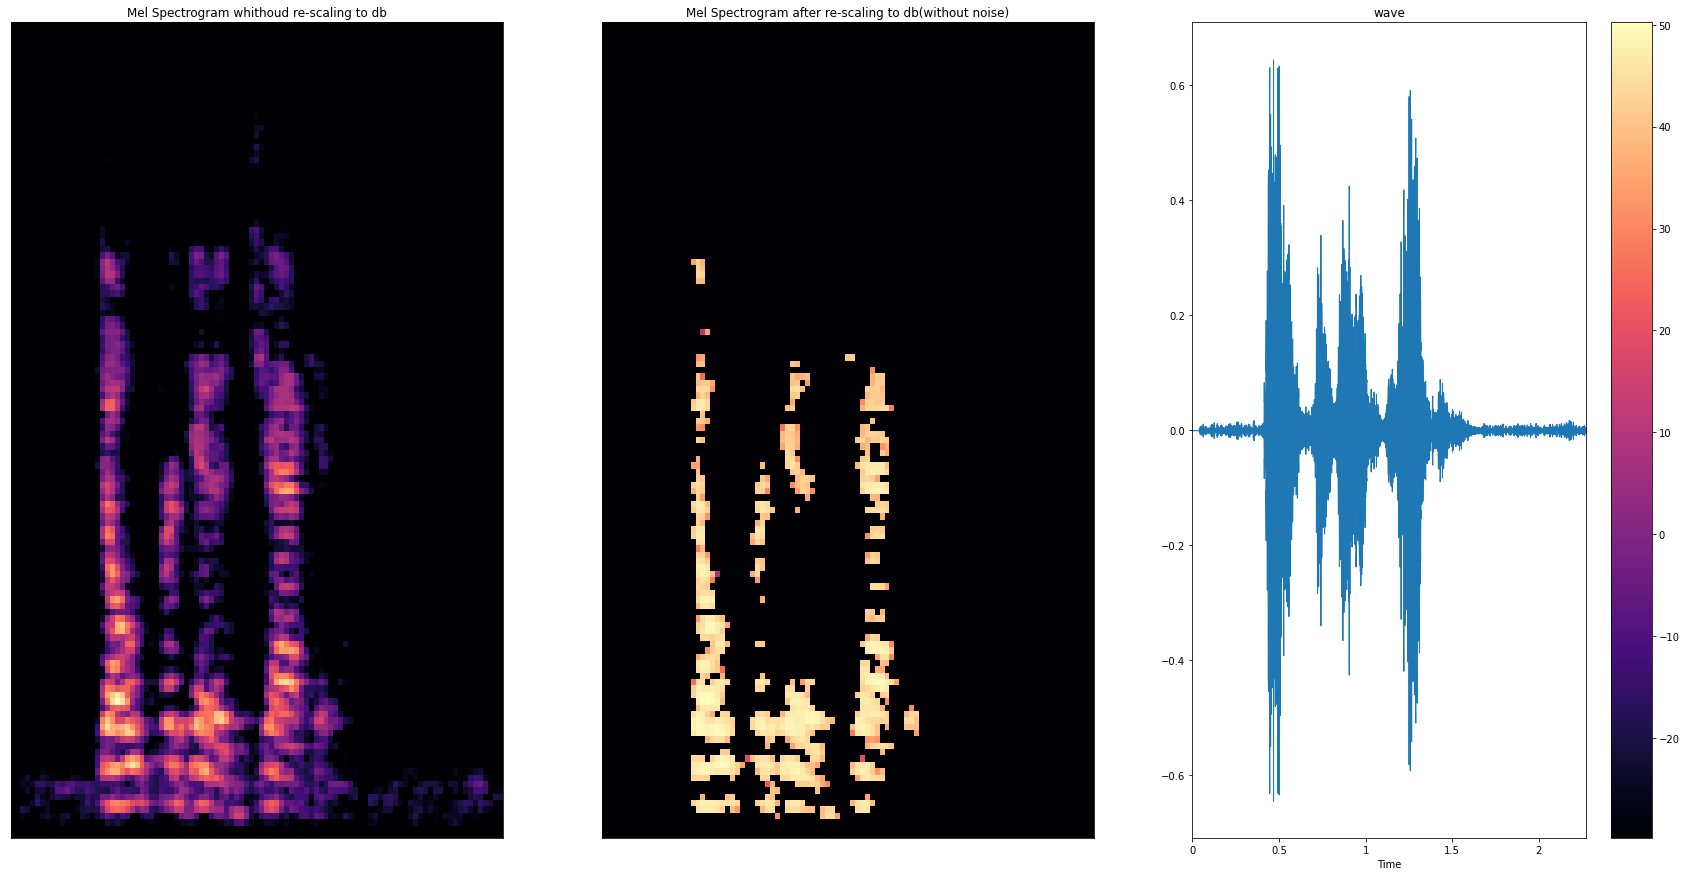

In [ ]:
create_mel_spectrogram_feature(dataframe)
print(dataframe.head())

# **3. Building the Model**

a. Split the data into 70% training and validation and
30% testing.
b. Use 5% of the training and validation data for
validation.

In [ ]:
def get_splitted_data(dataframe):
    # we startify the data corresponding to label as the should be dsitributed on all the splitted data
    factor=dataframe['Label']
    data_train, data_test = train_test_split(dataframe, test_size = 0.3, random_state=0,stratify = factor)
    factor=data_train['Label']
    data_train, data_validation = train_test_split(data_train, test_size = 0.05,random_state=0, stratify = factor)
    print("train size : ",data_train.shape)
    print("test size : ",data_test.shape)
    print("validation size : ",data_validation.shape)

    return data_train,data_test,data_validation

In [ ]:
data_train,data_test,data_validation=get_splitted_data(dataframe)

train size :  (4948, 3)
test size :  (2233, 3)
validation size :  (261, 3)
